In [1]:
import pandas as pd
from glob import glob
from matplotlib import pyplot as plt
import seaborn as sns
import unidecode
from tqdm import tqdm
tqdm.pandas()

import os
os.chdir('/Users/markjos/projects/malachor5')
import sys
sys.path.append('scripts')
from eval import get_metrics_by_language, get_word_language

In [2]:
march12_eval_path='data/biling_eval/elan_outputs/HH20210312/checkpoints-eval.csv'
sep13_eval_path='data/biling_eval/elan_outputs/HH20210913/checkpoints-eval.csv'
asr_eval_path='data/biling_eval/elan_outputs/tira-clean-split-eval.csv'
biling_eval_path='data/hf-datasets/tira-longlabels/checkpoints-eval.csv'
tb_path='data/whisper-large-runs.csv'

In [3]:
biling_eval_df=pd.read_csv(biling_eval_path)
biling_eval_df.head()

,eval_loss,eval_model_preparation_time,eval_wer,eval_cer,eval_runtime,eval_samples_per_second,eval_steps_per_second,checkpoint,dataset
0,1.164807,0.0117,0.970547,0.685139,95.2377,0.924,0.116,/home/AD/mjsimmons/models/whisper-large-v3-LoR...,HH20210312
1,2.270848,0.0117,0.863623,0.653325,70.2137,0.926,0.128,/home/AD/mjsimmons/models/whisper-large-v3-LoR...,HH20210913
2,1.174528,0.0119,1.192987,0.867983,94.0380,0.936,0.117,/home/AD/mjsimmons/models/whisper-large-v3-LoR...,HH20210312
3,2.435325,0.0119,0.917076,0.718570,72.2138,0.900,0.125,/home/AD/mjsimmons/models/whisper-large-v3-LoR...,HH20210913
4,1.123119,0.0118,0.993548,0.661434,95.9926,0.917,0.115,/home/AD/mjsimmons/models/whisper-large-v3-LoR...,HH20210312


In [4]:
march_df=pd.read_csv(march12_eval_path)
march_df.head()

,eval_loss,eval_model_preparation_time,eval_wer,eval_cer,eval_cer_processed,eval_wer_processed,eval_runtime,eval_samples_per_second,eval_steps_per_second,checkpoint
0,NaN,NaN,1.607442,0.935779,NaN,NaN,NaN,NaN,NaN,0
1,1.123045,0.0135,0.925947,0.699217,0.708213,0.980365,512.2158,0.172,0.043,/home/AD/mjsimmons/models/whisper-large-tira-y...
2,1.165942,0.0136,0.824404,0.631477,0.641508,0.874895,301.2922,0.292,0.073,/home/AD/mjsimmons/models/whisper-large-tira-y...
3,1.240919,0.0135,0.856662,0.729084,0.734122,0.883310,175.8288,0.500,0.125,/home/AD/mjsimmons/models/whisper-large-tira-y...
4,1.327963,0.0126,0.893128,0.707988,0.708573,0.913043,205.3396,0.429,0.107,/home/AD/mjsimmons/models/whisper-large-tira-y...


In [5]:
sep_df=pd.read_csv(sep13_eval_path)
sep_df.head()

,eval_loss,eval_model_preparation_time,eval_wer,eval_cer,eval_cer_processed,eval_wer_processed,eval_runtime,eval_samples_per_second,eval_steps_per_second,checkpoint
0,NaN,NaN,0.522392,0.377644,NaN,NaN,NaN,NaN,NaN,0
1,2.188538,0.0122,0.940191,0.685486,0.683642,0.995955,593.6223,0.109,0.029,/home/AD/mjsimmons/models/whisper-large-tira-y...
2,2.287274,0.0131,0.911586,0.692971,0.702679,0.976596,322.7450,0.201,0.053,/home/AD/mjsimmons/models/whisper-large-tira-y...
3,2.443920,0.0131,0.904363,0.757349,0.755613,0.965039,270.4858,0.240,0.063,/home/AD/mjsimmons/models/whisper-large-tira-y...
4,2.578733,0.0135,0.947992,0.805185,0.805456,0.976885,192.5449,0.338,0.088,/home/AD/mjsimmons/models/whisper-large-tira-y...


In [6]:
asr_df=pd.read_csv(asr_eval_path)
asr_df.head()

,checkpoint,epoch,cer,wer
0,whisper-large-v3,0,0.775819,0.879102
1,checkpoint-2048,1,0.148555,0.589172
2,checkpoint-4096,2,0.128928,0.557492
3,checkpoint-6144,3,0.130384,0.555816
4,checkpoint-8192,4,0.124728,0.521623


In [7]:
long_df=pd.read_csv(tb_path)
long_df['epoch']=long_df['step']/2048
long_df.head()

,step,tag,value,experiment_name,lid_loss_alpha,LoRA,lang_prompt,train_lang_token,embedding_distance_regularization_type,distance_regularization_lambda,epoch
0,0,eval/cer,2.546272,NaN,NaN,False,-1,False,NaN,NaN,0.0
1,0,eval/loss,3.526996,NaN,NaN,False,-1,False,NaN,NaN,0.0
2,0,eval/model_preparation_time,0.017100,NaN,NaN,False,-1,False,NaN,NaN,0.0
3,0,eval/runtime,401.389709,NaN,NaN,False,-1,False,NaN,NaN,0.0
4,0,eval/samples_per_second,5.102000,NaN,NaN,False,-1,False,NaN,NaN,0.0


In [9]:
long_df['tag'].unique()

array(['eval/cer', 'eval/loss', 'eval/model_preparation_time',
       'eval/runtime', 'eval/samples_per_second', 'eval/steps_per_second',
       'eval/wer', 'eval/HH20210312_cer', 'eval/HH20210312_loss',
       'eval/HH20210312_runtime', 'eval/HH20210312_samples_per_second',
       'eval/HH20210312_steps_per_second', 'eval/HH20210312_wer',
       'eval/HH20210913_cer', 'eval/HH20210913_loss',
       'eval/HH20210913_runtime', 'eval/HH20210913_samples_per_second',
       'eval/HH20210913_steps_per_second', 'eval/HH20210913_wer',
       'eval/tira-clean-split_cer', 'eval/tira-clean-split_loss',
       'eval/tira-clean-split_runtime',
       'eval/tira-clean-split_samples_per_second',
       'eval/tira-clean-split_steps_per_second',
       'eval/tira-clean-split_wer', 'eval/tira-longlabels-no-val-eng_cer',
       'eval/tira-longlabels-no-val-eng_loss',
       'eval/tira-longlabels-no-val-eng_runtime',
       'eval/tira-longlabels-no-val-eng_samples_per_second',
       'eval/tira-longlabel

In [8]:
longlabels_ds='tira-longlabels'
asr_ds='tira-clean-split'
march_ds='HH20210312'
sep_ds='HH20210913'

long_asr_cer = long_df[long_df['tag']==f'eval/{asr_ds}_cer'].copy()
long_asr_wer = long_df[long_df['tag']==f'eval/{asr_ds}_wer'].copy()
long_asr_cer['cer']=long_asr_cer['value']
long_asr_wer['wer']=long_asr_wer['value']
long_asr = long_asr_cer[['epoch','cer']].merge(long_asr_wer[['epoch','wer']], on='epoch')

long_march_cer = long_df[long_df['tag']==f'eval/{march_ds}_cer'].copy()
long_march_wer = long_df[long_df['tag']==f'eval/{march_ds}_wer'].copy()
long_march_cer['cer']=long_march_cer['value']
long_march_wer['wer']=long_march_wer['value']
long_march = long_march_cer[['epoch','cer']].merge(long_march_wer[['epoch','wer']], on='epoch')

long_sep_cer = long_df[long_df['tag']==f'eval/{sep_ds}_cer'].copy()
long_sep_wer = long_df[long_df['tag']==f'eval/{sep_ds}_wer'].copy()
long_sep_cer['cer']=long_sep_cer['value']
long_sep_wer['wer']=long_sep_wer['value']
long_sep = long_sep_cer[['epoch','cer']].merge(long_sep_wer[['epoch','wer']], on='epoch')

In [9]:
get_chkpnt_num=lambda s:int(s.split('-')[-1])//2048
march_df['checkpoint_num']=march_df['checkpoint'].apply(get_chkpnt_num)
sep_df['checkpoint_num']=sep_df['checkpoint'].apply(get_chkpnt_num)

In [10]:
sep_df=sep_df.rename({'eval_wer':'WER', 'eval_cer': 'CER', 'checkpoint_num': 'Epoch'}, axis=1)
march_df=march_df.rename({'eval_wer':'WER', 'eval_cer': 'CER', 'checkpoint_num': 'Epoch'}, axis=1)
asr_df=asr_df.rename({'cer': 'CER', 'wer': 'WER', 'epoch': 'Epoch'}, axis=1)

In [11]:
long_asr=long_asr.rename({'cer': 'CER', 'wer': 'WER', 'epoch': 'Epoch'}, axis=1)
long_march=long_march.rename({'cer': 'CER', 'wer': 'WER', 'epoch': 'Epoch'}, axis=1)
long_sep=long_sep.rename({'cer': 'CER', 'wer': 'WER', 'epoch': 'Epoch'}, axis=1)

In [12]:
sep_df.columns, march_df.columns, asr_df.columns

(Index(['eval_loss', 'eval_model_preparation_time', 'WER', 'CER',
        'eval_cer_processed', 'eval_wer_processed', 'eval_runtime',
        'eval_samples_per_second', 'eval_steps_per_second', 'checkpoint',
        'Epoch'],
       dtype='object'),
 Index(['eval_loss', 'eval_model_preparation_time', 'WER', 'CER',
        'eval_cer_processed', 'eval_wer_processed', 'eval_runtime',
        'eval_samples_per_second', 'eval_steps_per_second', 'checkpoint',
        'Epoch'],
       dtype='object'),
 Index(['checkpoint', 'Epoch', 'CER', 'WER'], dtype='object'))

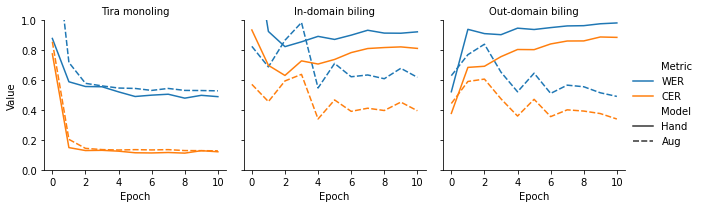

In [13]:


for df in [asr_df, long_asr]:
    df['Dataset'] = 'Tira monoling'
for df in [march_df, long_march]:
    df['Dataset'] = 'In-domain biling'
for df in [sep_df, long_sep]:
    df['Dataset'] = 'Out-domain biling'

hand_dfs = [asr_df, march_df, sep_df]
for df in hand_dfs:
    df['Model']='Hand'
aug_dfs = [long_asr, long_march, long_sep]
for df in aug_dfs:
    df['Model']='Aug'
wer_dfs=[
    df[['WER', 'Epoch', 'Model', 'Dataset']].rename({'WER': 'Value'}, axis=1) for df in hand_dfs+aug_dfs
]
for df in wer_dfs:
    df['Metric']='WER'
cer_dfs = [
    df[['CER', 'Epoch', 'Model', 'Dataset']].rename({'CER': 'Value'}, axis=1) for df in hand_dfs+aug_dfs
]
for df in cer_dfs:
    df['Metric']='CER'

asr_metrics_df = pd.concat(wer_dfs+cer_dfs)

g = sns.FacetGrid(asr_metrics_df, col='Dataset')
g.map_dataframe(sns.lineplot, x='Epoch', y='Value', style='Model', hue='Metric')
g.set_titles('{col_name}')
g.add_legend()
plt.ylim(0, 1)
# p = sns.lineplot(asr_metrics_df[asr_metrics_df['Dataset']=='Out-domain'], x='Epoch', y='Value', hue='Metric', style='Model')
# p.set_title('Monolingual Tira WER and CER')
# p
plt.show()

In [14]:
rows = []
for dataset in ['Tira monoling', 'In-domain biling', 'Out-domain biling']:
    for model in ['Tira only', 'Aug']:
        row = {'Dataset': dataset, 'Model': model}
        for metric in ['WER', 'CER']:
            sub_df = asr_metrics_df[(asr_metrics_df['Model']==model) & (asr_metrics_df['Dataset']==dataset) & (asr_metrics_df['Metric']==metric)]
            min_row = sub_df.sort_values('Value').iloc[0]
            row['Best '+metric] = round(min_row['Value'], 2)
            row['Epoch'] = int(min_row['Epoch'])
            final_row = sub_df[sub_df['Epoch']==sub_df['Epoch'].max()].iloc[0]
            row['Final '+metric] = round(final_row['Value'], 2)
        rows.append(row)
print(pd.DataFrame(rows).sort_values(['Dataset', 'Model'], ascending=False)[['Dataset', 'Model', 'Best WER', 'Best CER', 'Epoch']].to_latex(index=False))

IndexError: single positional indexer is out-of-bounds

In [15]:
mar_csvs=glob('data/biling_eval/elan_outputs/HH20210312/*.csv')
sep_csvs=glob('data/biling_eval/elan_outputs/HH20210913/*.csv')
mar_csvs=[x for x in mar_csvs if 'checkpoints-eval' not in x]
sep_csvs=[x for x in sep_csvs if 'checkpoints-eval' not in x]
yo_csvs=glob('data/asr-biling-eval-jan10/*.csv')
mar_csvs_yo=[x for x in yo_csvs if ('HH20210312' in x) or ('whisper' in x)]
sep_csvs_yo=[x for x in yo_csvs if ('HH20210913' in x) or ('whisper' in x)]

mar_csvs_long=glob('data/hf-datasets/tira-longlabels/HH20210312-eval/*.csv')
sep_csvs_long=glob('data/hf-datasets/tira-longlabels/HH20210913-eval/*.csv')
mar_csvs_long=[x for x in mar_csvs_long if 'checkpoints-eval' not in x]
sep_csvs_long=[x for x in sep_csvs_long if 'checkpoints-eval' not in x]
yo_csvs_long=glob('data/longlabels-biling-eval-jan10/*.csv')
mar_csvs_long_yo=[x for x in yo_csvs_long if ('HH20210312' in x) or ('whisper' in x)]
sep_csvs_long_yo=[x for x in yo_csvs_long if ('HH20210913' in x) or ('whisper' in x)]

csv_dict = {
    'mar': mar_csvs,
    'sep': sep_csvs,
    'mar_yo': mar_csvs_yo,
    'sep_yo': sep_csvs_yo,
    'mar_long': mar_csvs_long,
    'sep_long': sep_csvs_long,
    'mar_long_yo': mar_csvs_long_yo,
    'sep_long_yo': sep_csvs_long_yo
}

In [16]:
march_labels=pd.read_csv(mar_csvs[0])['labels']
sep_labels=pd.read_csv(sep_csvs[0])['labels']

In [17]:
def get_tira_pct(labels):
    lang_tags = labels.apply(lambda s: [get_word_language(w) for w in s])
    tira_ct = lang_tags.apply(lambda l: l.count('tira'))
    word_ct = lang_tags.apply(len)
    return tira_ct.sum()/word_ct.sum()
print(f"{get_tira_pct(march_labels):.2%} of March data is Tira")
print(f"{get_tira_pct(sep_labels):.2%} of Sep data is Tira")

8.60% of March data is Tira
2.86% of Sep data is Tira


In [18]:
len(march_labels), len(sep_labels)

(88, 65)

    Monolingual & train &  16,384 & 9.48.hr & 100 \\
    Monolingual & dev & 5,966 & 11.3hr & 100 \\
    Bilingual & train & 16,384 & 51.8hr & 21.0 & 5.3 \\
    Bilingual in-domain & test & 88 & 38.5m & 8.60 \\
    Bilingual out-domain & test & 65 & 28.5m & 2.86 \\

In [19]:
(28.5*60)/(65)

26.307692307692307

In [20]:
13*(3/5)

7.8

In [21]:
get_chkpnt_num_file=lambda s:int(os.path.splitext(os.path.basename(s))[0].split('-')[1])//2048
preds_df_dict={}
for csv_name, checkpoint_csvs in csv_dict.items():
    csv_df = pd.DataFrame()
    if 'mar' in csv_name:
        csv_df['labels']=march_labels
    else:
        csv_df['labels']=sep_labels
    csv_df['Language prompt'] = 'Yoruba' if 'yo' in csv_name else 'LID'
    csv_df['Model'] = 'Aug' if 'long' in csv_name else 'Hand'
    csv_df['Dataset'] = 'In-domain biling' if 'mar' in csv_name else 'Out-domain biling'
    for csv in checkpoint_csvs:
        checkpoint_num=get_chkpnt_num_file(csv)
        checkpoint_df=pd.read_csv(csv)
        csv_df[f'{checkpoint_num}']=checkpoint_df['preds']
    preds_df_dict[csv_name]=csv_df

In [22]:
for k, df in preds_df_dict.items():
    print(k)
    print(df.shape)

mar
(88, 15)
sep
(65, 15)
mar_yo
(88, 15)
sep_yo
(65, 15)
mar_long
(88, 15)
sep_long
(65, 15)
mar_long_yo
(88, 15)
sep_long_yo
(65, 15)


In [23]:
def add_metrics_by_epoch(df):
    df=df.fillna('')
    labels=df['labels'].tolist()
    for i in tqdm(range(11)):
        epoch_col=str(i)
        preds = df[epoch_col].tolist()
        colwer=get_metrics_by_language(labels, preds, metric='wer', ignore_punct=False)
        wer_df = pd.DataFrame(colwer)
        for col in wer_df.columns:
            df[col+epoch_col]=wer_df[col]
        colcer=get_metrics_by_language(labels, preds, metric='cer', ignore_punct=False)
        cer_df = pd.DataFrame(colcer)
        for col in cer_df.columns:
            df[col+epoch_col]=cer_df[col]
    return df

In [24]:
metrics_df_dict={k:add_metrics_by_epoch(v) for k,v in preds_df_dict.items()}

  0%|          | 0/11 [00:00<?, ?it/s]/var/folders/bt/_dsrh6ld2yncbnn9vk_d2lcc0000gp/T/ipykernel_86598/2717498812.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col+epoch_col]=cer_df[col]
/var/folders/bt/_dsrh6ld2yncbnn9vk_d2lcc0000gp/T/ipykernel_86598/2717498812.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col+epoch_col]=cer_df[col]
/var/folders/bt/_dsrh6ld2yncbnn9vk_d2lcc0000gp/T/ipykernel_86598/2717498812.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `fra

In [25]:
edit_cols = ['cer', 'wer']

langs = ['tira', 'eng', 'misc']
edits = ['insertion', 'deletion', 'hit']
for lang in langs:
    for edit in edits:
        edit_cols.append(f'{lang}_{edit}_rate')
        edit_cols.append(f'{lang}_char_{edit}_rate')
    for lang2 in langs:
        edit_cols.append(f'{lang}2{lang2}_substitution_rate')
        edit_cols.append(f'{lang}2{lang2}_char_substitution_rate')
    edit_cols.append(f'{lang}_wer')
    edit_cols.append(f'{lang}_cer')

In [26]:
# write a function to reshape a dataframe so that the columns are 'epoch', 'metric', 'value'
def reshape_df_for_metrics(df):
    rows = []
    for i in range(11):
        epoch_col=str(i)
        for edit in edit_cols:
            rows.append({
                'Metric': edit,
                'Value': df[edit+epoch_col].mean(),
                'Epoch': epoch_col,
                'Model': df['Model'].iloc[0],
                'Dataset': df['Dataset'].iloc[0],
                'Language prompt': df['Language prompt'].iloc[0]
            })
    return pd.DataFrame(rows)
pred_metrics=pd.concat(reshape_df_for_metrics(df) for df in metrics_df_dict.values())
pred_metrics['Language']=pred_metrics['Metric'].apply(lambda s: 'Total' if s in ('wer', 'cer') else 'Eng' if s.startswith('eng') else s[:4].capitalize())
pred_metrics.head()


,Metric,Value,Epoch,Model,Dataset,Language prompt,Language
0,cer,0.775819,0,Hand,In-domain biling,LID,Total
1,wer,0.879102,0,Hand,In-domain biling,LID,Total
2,tira_insertion_rate,0.000000,0,Hand,In-domain biling,LID,Tira
3,tira_char_insertion_rate,0.000000,0,Hand,In-domain biling,LID,Tira
4,tira_deletion_rate,0.408172,0,Hand,In-domain biling,LID,Tira


In [27]:
def normalize_metric_name(s):
    if s in ('wer', 'cer'):
        return s.upper()
    no_lang_prefix = s[3:] if s.startswith('eng') else s[4:]
    if no_lang_prefix.startswith('2'):
        tgt_lang = no_lang_prefix.split('_')[0][1:]
        return f"-> {tgt_lang.capitalize()} sub rate"
    return no_lang_prefix.replace('_', ' ').strip().capitalize().replace('Wer', 'WER').replace('Cer', 'CER')

pred_metrics['Metric']=pred_metrics['Metric'].apply(normalize_metric_name)
pred_metrics.head()

,Metric,Value,Epoch,Model,Dataset,Language prompt,Language
0,CER,0.775819,0,Hand,In-domain biling,LID,Total
1,WER,0.879102,0,Hand,In-domain biling,LID,Total
2,Insertion rate,0.000000,0,Hand,In-domain biling,LID,Tira
3,Char insertion rate,0.000000,0,Hand,In-domain biling,LID,Tira
4,Deletion rate,0.408172,0,Hand,In-domain biling,LID,Tira


In [28]:
asr_metrics_df['Language']='Total'
asr_metrics_df['Language prompt']='Yoruba'
pred_metrics_all3=pd.concat([pred_metrics, asr_metrics_df[asr_metrics_df['Dataset']=='Tira monoling']])
pred_metrics_all3['Dataset'].unique()

array(['In-domain biling', 'Out-domain biling', 'Tira monoling'],
      dtype=object)

In [29]:
pred_metrics_all3['Epoch']=pred_metrics_all3['Epoch'].astype(int)
pred_metrics['Epoch']=pred_metrics['Epoch'].astype(int)

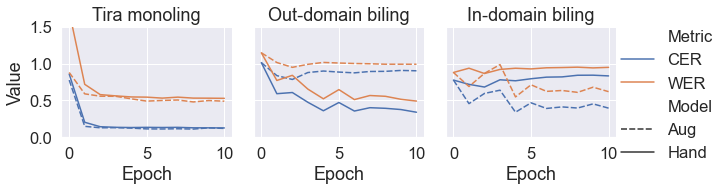

In [30]:
sns.set_theme(font_scale=1.5)
g = sns.FacetGrid(
    pred_metrics_all3[
        (pred_metrics_all3['Metric'].isin(['WER', 'CER'])) &
        (pred_metrics_all3['Language']=='Total') &
        (pred_metrics_all3['Language prompt']=='Yoruba')
    ].sort_values('Dataset', ascending=False),
    col='Dataset',
    # row='Model',
)
g.set_titles('{col_name}')
g.map_dataframe(sns.lineplot, x='Epoch', y='Value', hue='Metric', style='Model')
g.add_legend()
plt.ylim(0,1.5)
plt.show()

In [31]:
pred_metrics_all3[
    (pred_metrics_all3['Dataset']=='Tira monoling') &
    (pred_metrics_all3['Epoch']<2) &
    (pred_metrics_all3['Model']=='Aug')
]

,Metric,Value,Epoch,Model,Dataset,Language prompt,Language
0,WER,1.706504,0,Aug,Tira monoling,Yoruba,Total
1,WER,0.718404,1,Aug,Tira monoling,Yoruba,Total
0,CER,0.856826,0,Aug,Tira monoling,Yoruba,Total
1,CER,0.203660,1,Aug,Tira monoling,Yoruba,Total


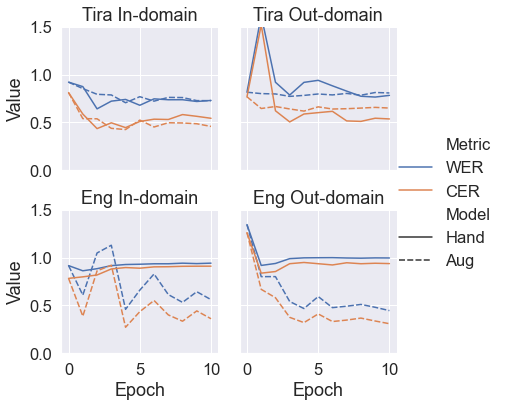

In [32]:
pred_metrics['Dataset short']=pred_metrics['Dataset'].apply(lambda s: s.replace(' biling', ''))
g = sns.FacetGrid(
    pred_metrics[
        (pred_metrics['Metric'].isin(['WER', 'CER'])) &
        (pred_metrics['Language'].isin(['Tira', 'Eng']))&
        (pred_metrics['Language prompt']=='Yoruba')
    ],
    col='Dataset short',
    row='Language',
)
g.set_titles("{row_name} {col_name}")
g.map_dataframe(sns.lineplot, x='Epoch', y='Value', style='Model', hue='Metric')
g.add_legend()
plt.ylim(0,1.5)
plt.show()

In [33]:
' '.join(str(i*2048) for i in range(11))

'0 2048 4096 6144 8192 10240 12288 14336 16384 18432 20480'

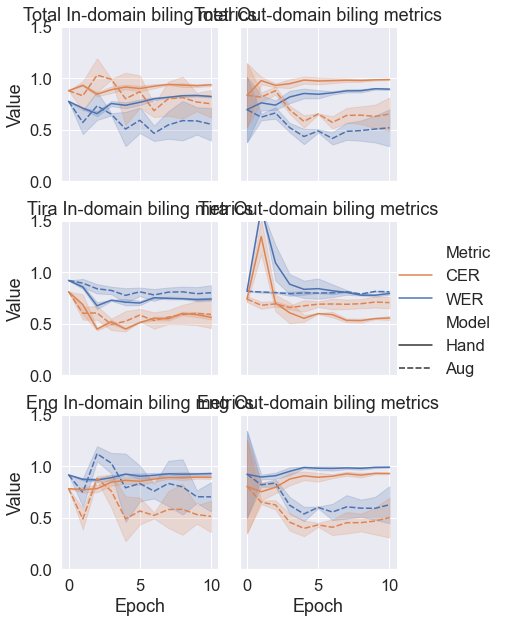

In [34]:
g = sns.FacetGrid(
    pred_metrics[
        (pred_metrics['Metric'].isin(['WER', 'CER'])) &
        (pred_metrics['Language']!='Misc')# &
        # (pred_metrics['Model']=='Aug')
    ],
    col='Dataset',
    row='Language',
)
g.set_titles('{row_name} {col_name} metrics')
g.map_dataframe(sns.lineplot, x='Epoch', y='Value', style='Model', hue='Metric')
g.add_legend()
plt.ylim(0,1.5)
plt.show()

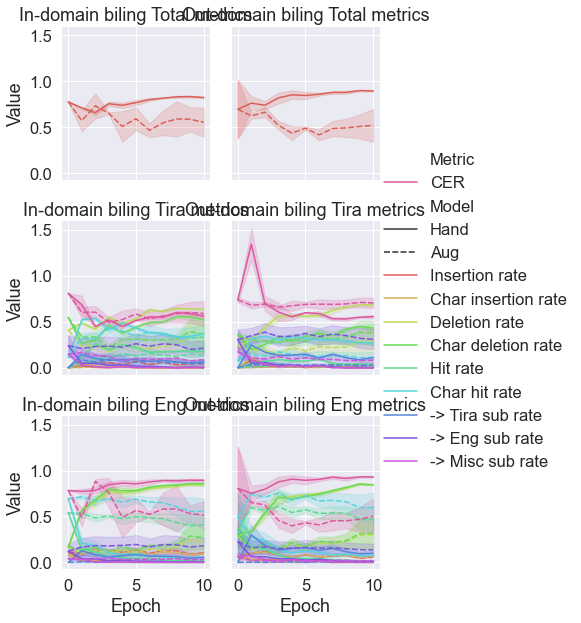

In [35]:
g = sns.FacetGrid(
    pred_metrics[
        (~pred_metrics['Metric'].str.contains('WER')) &
        (pred_metrics['Language']!='Misc')
    ],
    col='Dataset',
    row='Language',
)
g.set_titles('{col_name} {row_name} metrics')
g.map_dataframe(sns.lineplot, x='Epoch', y='Value', style='Model', hue='Metric', palette='hls')
g.add_legend()
plt.show()

In [36]:
def plot_sub(metrics, long_metrics, lang):
    plt.figure(figsize=(8,8))
    x_values = list(range(11))

    plt.plot(x_values, long_metrics['eng2tira_substitution_rate'], label=f'Synth {lang} to Tira substitution rate', linestyle='--', color='blue')
    plt.plot(x_values, long_metrics['eng2eng_substitution_rate'], label=f'Synth {lang} to Eng substitution rate', linestyle='--', color='green')
    plt.plot(x_values, long_metrics['eng2misc_substitution_rate'], label=f'Synth {lang} to misc substitution rate', linestyle='--', color='brown')

    plt.plot(x_values, metrics['eng2tira_substitution_rate'], label=f'Hand {lang} to Tira substitution rate', linestyle='-', color='blue')
    plt.plot(x_values, metrics['eng2eng_substitution_rate'], label=f'Hand {lang} to Eng substitution rate', linestyle='-', color='green')
    plt.plot(x_values, metrics['eng2misc_substitution_rate'], label=f'Hand {lang} to misc substitution rate', linestyle='-', color='brown')

    # Adding labels and title
    plt.xlabel('Epoch')
    plt.title(f'{lang} error metrics')
    plt.legend()
    plt.ylim((0,1))

    # Show plot
    plt.show()
plot_sub(march_preds_metrics, march_preds_long_metrics, 'eng')

NameError: name 'march_preds_metrics' is not defined

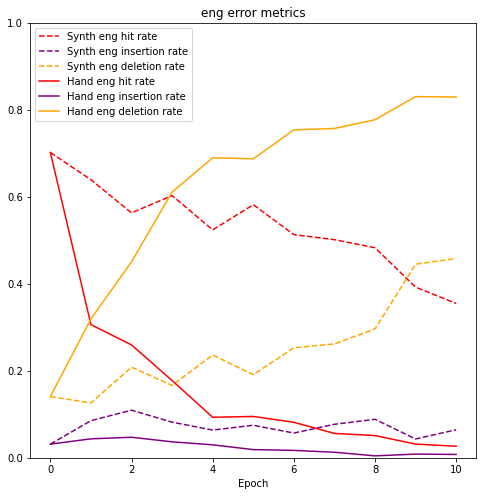

In [257]:
plot_insert_hit_delete(sep_preds_metrics, sep_preds_long_metrics, 'eng')

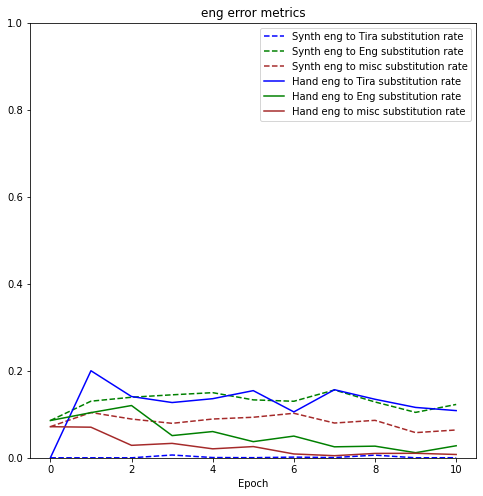

In [ ]:
plot_sub(sep_preds_metrics, sep_preds_long_metrics, 'eng')

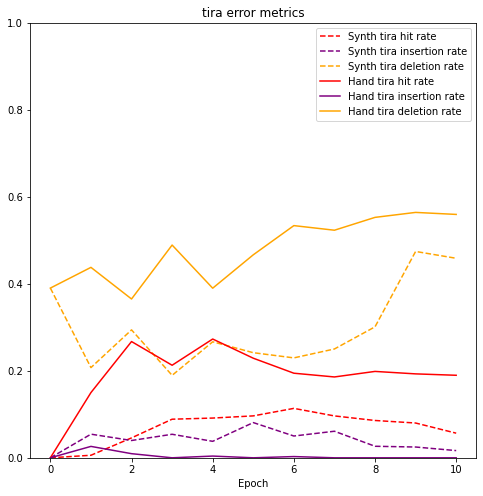

In [ ]:
plot_insert_hit_delete(march_preds_metrics, march_preds_long_metrics, 'tira')

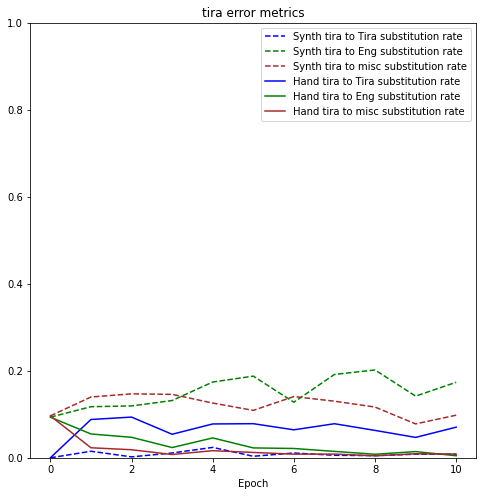

In [ ]:
plot_sub(march_preds_metrics, march_preds_long_metrics, 'tira')

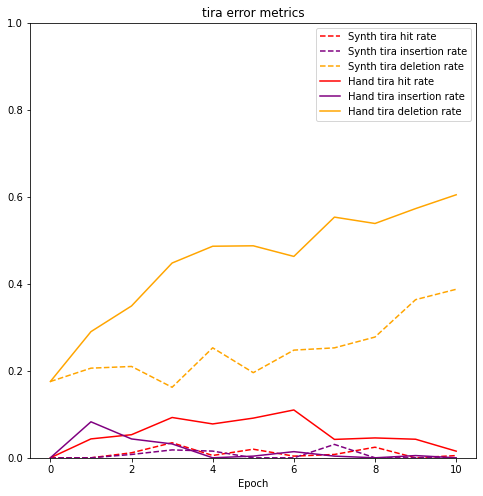

In [ ]:
plot_insert_hit_delete(sep_preds_metrics, sep_preds_long_metrics, 'tira')

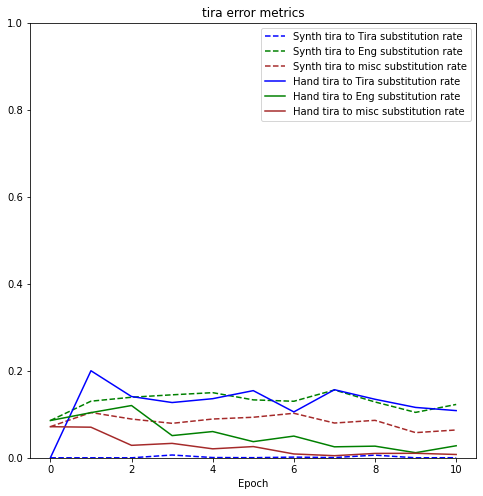

In [ ]:
plot_sub(sep_preds_metrics, sep_preds_long_metrics, 'tira')

In [263]:
sep_preds_df[['Percent Tira']+['wer'+str(i) for i in range(11)]].corr()

,Percent Tira,wer0,wer1,wer2,wer3,wer4,wer5,wer6,wer7,wer8,wer9,wer10
Percent Tira,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wer0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wer1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wer2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wer3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wer4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wer5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wer6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wer7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wer8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [264]:
sep_preds_df[['Percent Tira']+['cer'+str(i) for i in range(11)]].corr()

,Percent Tira,cer0,cer1,cer2,cer3,cer4,cer5,cer6,cer7,cer8,cer9,cer10
Percent Tira,1.000000,0.228523,0.426577,0.224523,0.332833,0.186463,0.276205,0.156061,0.000126,-0.014515,-0.113310,0.059139
cer0,0.228523,1.000000,0.204412,0.109790,0.157056,0.048775,0.155859,0.121605,0.060425,0.096662,-0.024112,0.062070
cer1,0.426577,0.204412,1.000000,0.204850,0.306043,0.127295,0.458210,0.068637,0.163168,0.016025,0.070330,0.245196
cer2,0.224523,0.109790,0.204850,1.000000,0.446592,0.295042,0.385332,0.308313,0.322162,0.230067,0.111734,0.339153
cer3,0.332833,0.157056,0.306043,0.446592,1.000000,0.294761,0.467058,0.512006,0.470293,0.262134,0.249197,0.454932
cer4,0.186463,0.048775,0.127295,0.295042,0.294761,1.000000,0.283416,0.243163,0.314456,0.143906,0.306302,0.344167
cer5,0.276205,0.155859,0.458210,0.385332,0.467058,0.283416,1.000000,0.376855,0.473519,0.288605,0.118898,0.316945
cer6,0.156061,0.121605,0.068637,0.308313,0.512006,0.243163,0.376855,1.000000,0.604489,0.379521,0.273100,0.411830
cer7,0.000126,0.060425,0.163168,0.322162,0.470293,0.314456,0.473519,0.604489,1.000000,0.429186,0.176304,0.302797
cer8,-0.014515,0.096662,0.016025,0.230067,0.262134,0.143906,0.288605,0.379521,0.429186,1.000000,0.359959,0.332085


In [265]:
march_preds_df[['Percent Tira']+['wer'+str(i) for i in range(11)]].corr()

,Percent Tira,wer0,wer1,wer2,wer3,wer4,wer5,wer6,wer7,wer8,wer9,wer10
Percent Tira,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wer0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wer1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wer2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wer3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wer4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wer5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wer6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wer7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wer8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [266]:
march_preds_df[['Percent Tira']+['cer'+str(i) for i in range(11)]].corr()

,Percent Tira,cer0,cer1,cer2,cer3,cer4,cer5,cer6,cer7,cer8,cer9,cer10
Percent Tira,1.000000,0.096641,-0.108672,-0.098415,-0.021994,-0.380942,-0.258848,-0.252678,-0.468272,-0.397614,-0.356308,-0.514726
cer0,0.096641,1.000000,-0.024353,0.119206,0.126500,0.120177,0.005141,0.025246,0.052497,-0.063239,0.043992,0.051760
cer1,-0.108672,-0.024353,1.000000,0.438750,0.085370,0.159676,0.232193,-0.000015,-0.106049,0.150956,0.202301,0.163539
cer2,-0.098415,0.119206,0.438750,1.000000,0.546058,0.573943,0.644991,0.475689,0.273863,0.394048,0.508296,0.457839
cer3,-0.021994,0.126500,0.085370,0.546058,1.000000,0.547282,0.667186,0.562859,0.466582,0.436720,0.557283,0.483953
cer4,-0.380942,0.120177,0.159676,0.573943,0.547282,1.000000,0.700431,0.671346,0.465884,0.538090,0.607107,0.656786
cer5,-0.258848,0.005141,0.232193,0.644991,0.667186,0.700431,1.000000,0.680629,0.594785,0.599104,0.688654,0.700634
cer6,-0.252678,0.025246,-0.000015,0.475689,0.562859,0.671346,0.680629,1.000000,0.654314,0.533555,0.614933,0.690237
cer7,-0.468272,0.052497,-0.106049,0.273863,0.466582,0.465884,0.594785,0.654314,1.000000,0.646202,0.619659,0.675226
cer8,-0.397614,-0.063239,0.150956,0.394048,0.436720,0.538090,0.599104,0.533555,0.646202,1.000000,0.708574,0.650869


In [267]:
march_preds_df.to_csv('data/biling_eval/elan_outputs/HH20210312_preds.csv')
sep_preds_df.to_csv('data/biling_eval/elan_outputs/HH20210913_preds.csv')

In [268]:
march_preds_df['Percent English']=1-march_preds_df['Percent Tira']
sep_preds_df['Percent English']=1-sep_preds_df['Percent Tira']

march_preds_long_df['Percent English']=1-march_preds_long_df['Percent Tira']
sep_preds_long_df['Percent English']=1-sep_preds_long_df['Percent Tira']

/var/folders/bt/_dsrh6ld2yncbnn9vk_d2lcc0000gp/T/ipykernel_90917/1270165617.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  march_preds_df['Percent English']=1-march_preds_df['Percent Tira']
/var/folders/bt/_dsrh6ld2yncbnn9vk_d2lcc0000gp/T/ipykernel_90917/1270165617.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sep_preds_df['Percent English']=1-sep_preds_df['Percent Tira']
/var/folders/bt/_dsrh6ld2yncbnn9vk_d2lcc0000gp/T/ipykernel_90917/1270165617.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usual

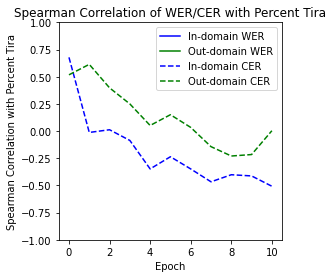

In [ ]:
correlation_data = {
    'wer': {'march_preds_df': [], 'sep_preds_df': []},
    'cer': {'march_preds_df': [], 'sep_preds_df': []}
}

# Iterate over wer and cer columns
for i in range(11):
    # Calculate Spearman correlation between Percent Tira and each cer/wer column for march_preds_df
    correlation_data['wer']['march_preds_df'].append(march_preds_df[['Percent Tira', f'wer{i}']].corr(method='spearman').iloc[0, 1])
    correlation_data['cer']['march_preds_df'].append(march_preds_df[['Percent Tira', f'cer{i}']].corr(method='spearman').iloc[0, 1])
    
    # Calculate Spearman correlation between Percent Tira and each cer/wer column for sep_preds_df
    correlation_data['wer']['sep_preds_df'].append(sep_preds_df[['Percent Tira', f'wer{i}']].corr(method='spearman').iloc[0, 1])
    correlation_data['cer']['sep_preds_df'].append(sep_preds_df[['Percent Tira', f'cer{i}']].corr(method='spearman').iloc[0, 1])

# Plotting
plt.figure(figsize=(4,4))
x_values = list(range(11))

# Plot wer correlations
plt.plot(x_values, correlation_data['wer']['march_preds_df'], label='In-domain WER', linestyle='-', color='blue')
plt.plot(x_values, correlation_data['wer']['sep_preds_df'], label='Out-domain WER', linestyle='-', color='green')

# Plot cer correlations
plt.plot(x_values, correlation_data['cer']['march_preds_df'], label='In-domain CER', linestyle='--', color='blue')
plt.plot(x_values, correlation_data['cer']['sep_preds_df'], label='Out-domain CER', linestyle='--', color='green')

# Adding labels and title
plt.xlabel('Epoch')
plt.ylabel('Spearman Correlation with Percent Tira')
plt.title('Spearman Correlation of WER/CER with Percent Tira')
plt.legend()
plt.ylim((-1,1))

# Show plot
plt.show()

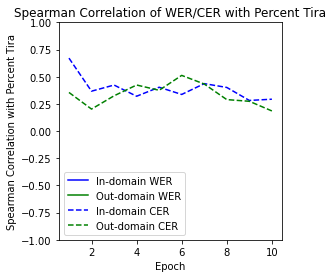

In [ ]:
correlation_data = {
    'wer': {'march_preds_long_df': [], 'sep_preds_long_df': []},
    'cer': {'march_preds_long_df': [], 'sep_preds_long_df': []}
}

# Iterate over wer and cer columns
for i in range(1,11):
    # Calculate Spearman correlation between Percent Tira and each cer/wer column for march_preds_long_df
    correlation_data['wer']['march_preds_long_df'].append(march_preds_long_df[['Percent Tira', f'wer{i}']].corr(method='spearman').iloc[0, 1])
    correlation_data['cer']['march_preds_long_df'].append(march_preds_long_df[['Percent Tira', f'cer{i}']].corr(method='spearman').iloc[0, 1])
    
    # Calculate Spearman correlation between Percent Tira and each cer/wer column for sep_preds_long_df
    correlation_data['wer']['sep_preds_long_df'].append(sep_preds_long_df[['Percent Tira', f'wer{i}']].corr(method='spearman').iloc[0, 1])
    correlation_data['cer']['sep_preds_long_df'].append(sep_preds_long_df[['Percent Tira', f'cer{i}']].corr(method='spearman').iloc[0, 1])

# Plotting
plt.figure(figsize=(4,4))
x_values = list(range(1,11))

# Plot wer correlations
plt.plot(x_values, correlation_data['wer']['march_preds_long_df'], label='In-domain WER', linestyle='-', color='blue')
plt.plot(x_values, correlation_data['wer']['sep_preds_long_df'], label='Out-domain WER', linestyle='-', color='green')

# Plot cer correlations
plt.plot(x_values, correlation_data['cer']['march_preds_long_df'], label='In-domain CER', linestyle='--', color='blue')
plt.plot(x_values, correlation_data['cer']['sep_preds_long_df'], label='Out-domain CER', linestyle='--', color='green')

# Adding labels and title
plt.xlabel('Epoch')
plt.ylabel('Spearman Correlation with Percent Tira')
plt.title('Spearman Correlation of WER/CER with Percent Tira')
plt.ylim((-1,1))
plt.legend()

# Show plot
plt.show()